# <h1><center>**Apple App Store Analysis**</center></h1>

<center>Ben Nguyen, Justin Arita, Madison Colbert</center>

<center> Contact Emails Respectively: bnguye26@lion.lmu.edu, jarita@lion.lmu.edu, mcolber1@lion.lmu.edu </center>

<center>Loyola Marymount University</center>

<center>College of Business Administration</center>

#**Executive Summary**

Apple Inc. is a multinational technology company. In our project, we focus our analysis on Apple’s App Store, an online platform where people can download application to be used on Apple computers and mobile devices. There are over 500,000 apps available on the App Store that cover a variety of genres including gaming, education, productivity, and lifestyle. Developers around the world create these apps to be purchased and/or downloaded. 30% of the revenue goes to Apple, while the other 70% goes to the developer (webopedia). Applications are being created everyday, and we aim to analytically look at this dataset from kaggle.com with questions in mind. What can one do to make their app reach the greatest amount of people? What categories of apps correlate most with success? Do free apps and paid apps have performance differences? We answered these questions through this mobile app store dataset that contains categories such as price, size, user rating, version number, etc. 

To initiate our analysis, we broke up our data into key categories we believed would be the most useful for data analyzation. These categories were free vs paid, genre, price, user rating, and size. We created visualizations of this to get a better idea of the distribution. We then ran a correlation matrix and began the modeling process using a variety of ski-kit learn packages that allowed us to test the accuracy of the plethora of models we created.

Through this process, we were able to see how saturated the game market is. We also found how behavior can change from a consumer standpoint when they rate apps that are free versus rating apps that are paid. We also were able to see the effects of how medical and gaming applications are also the largest in size and to see how consumers react to them. People must  be strategic about pricing and size as those are two important factors that affect popularity and reach. As the app store store continues to grow, developers must be able to recognize these trends in the data and adjust their apps accordingly to make it as successful as possible.

#**Table of Contents**

**1**.  **Introduction**
   *   Description of the project
   *   Explanation of purpose
   *   Methods used

**2.  Main Content and Analysis**
   
   > A.   Methodology
   
   > B.   Findings

   > C.   Interpretation of Findings

**3.  Practical Recommendations**

**4.  Conclusion**

**5.  Bibliography**

#**1. Introduction**

A) Apple Inc. is an innovative, multinational technology company headquartered in the United States. While Apple is mostly known for their variety of products, they also hold arguably the best platform in which consumers can purchase applications. They call this their "App Store." This digital platform opens up the world to browse and download apps for use within their products. We decided to take a further look into the App Store through a dataset we found on kaggle.com. The dataset was originally extracted from the iTunes Search API from apple.com and contains information about more than 7000 mobile applications. 

B)	Generally speaking, we want to answer this question: Is it possible to predict the popularity/success of an app? Are there categories that correlate with success? What categories are they? Rating? Price? App Size? All of these things play a role in the visibility of the application on the store, but we want to look into what specific things give apps an edge over others. We aim to use the data from kaggle to find key trends and information about what makes an app successful. With million of application in the market, developers must make their app stand out. We want to see if our data and analysis can help these kind of people stand out from the crowd. 

C)	With the appstore dataset, we were able to direct our analysis towards the success of an app. We splitted the data into free and non free and then created visualizations for this as well as categories like user rating, size, and price. This helped us digest the data better in a way that allowed us to analyze the app store market in a better way.  


#**2. Main Content and Analysis**

>  **A. Methodology**





The dataset we chose to analyze is from kaggle.com. It contains information from over 7000 applications on Apple's App Store. We worked with the dataset from kaggle called 'appleStore.csv.' 

The packages we used in our project (in chronological order) includes pandas, matplotlib, seaborn, and a variety from sklearn. 

We began our analysis by cleaning the data in a way that separated free apps and paid apps. We then visualized this. We then sorted the data by separating the apps by genre, and then again by free apps and paid apps by genre. We added visualizations for the user to get a better picture of the distribution. We then followed this by doing the same procedure for average user rating, average app size, and average price.

We then ran a correlation matrix to see the correlation of the column data / numerical features. We then created a rating count column by subtracting the total rating count by the rating count version column.

We then began to set up the modeling process by categorizing apps if they are good or not by using the metric of average user rating. If the rating is 4, then it’s a good app, otherwise it is considered not highly successful. 

We used scikit learn packages here to perform testing of our models. We ran a SVM model along with grid search.
We then ran a decision tree classifier model to see if it would be a better model.

We then continued testing our models by just running models to see which were the most accurate. We did hard soft voting, bootstrapping, random forest classification, adaptive boosting, and gradient boosting all to see which would execute the most accurate model.



>  **B. Findings**

In [ ]:
import pandas as pd
df = pd.read_csv('AppleStore.csv')
df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
import matplotlib.pyplot as plt


df['isFree'] = df['price'].apply(lambda x: 1 if x == 0.00 else 0)

#number of free apps
print('Number of free apps:',df.loc[df.isFree == 1, 'id'].count())

#number of paid apps
print('Number of paid apps:',df.loc[df.isFree == 0, 'id'].count())



Number of free apps: 4056
Number of paid apps: 3141


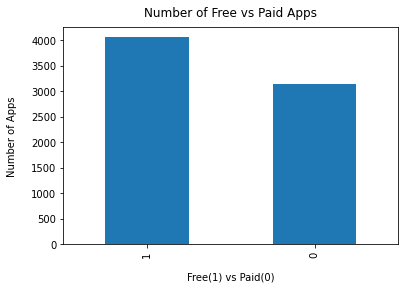

In [ ]:
#plot of number of free vs non free apps
df['isFree'].value_counts().plot(kind='bar')
plt.xlabel('Free(1) vs Paid(0)', labelpad=14)
plt.ylabel('Number of Apps', labelpad=14)
plt.title("Number of Free vs Paid Apps", y=1.02);

We wanted to look into the price aspect of apps. While there are many apps that are free with in-app purchases, most apps require an upfront purchase. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Number of Apps')

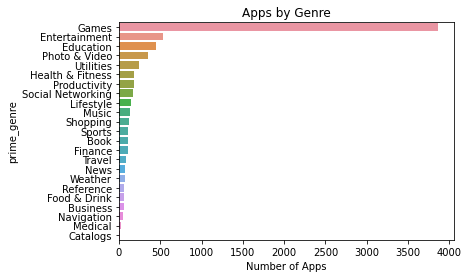

In [ ]:
#number of apps per genre
trending_genre = df.groupby('prime_genre')['id'].count().sort_values(ascending=False)

import seaborn as sns

sns.barplot(trending_genre,trending_genre.index)
plt.title('Apps by Genre')
plt.xlabel('Number of Apps')

We were also interested in knowing how often an app in each genre type was created.

Text(0.5, 0, 'Number of Apps')

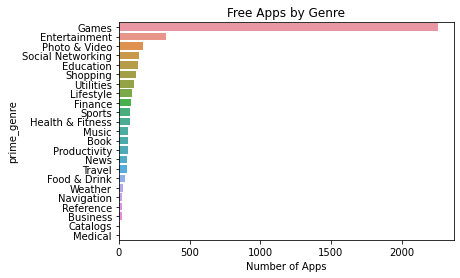

In [ ]:
#number of free apps per genre
trending_genre_is_free = df.loc[df.isFree == 1].groupby('prime_genre')['id'].count().sort_values(ascending=False)

sns.barplot(trending_genre_is_free,trending_genre_is_free.index)
plt.title('Free Apps by Genre')
plt.xlabel('Number of Apps')

Text(0, 0.5, 'Genre')

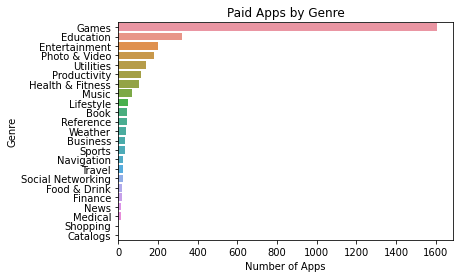

In [ ]:

#number of paid apps per genre
trending_genre_is_not_free = df.loc[df.isFree == 0].groupby('prime_genre')['id'].count().sort_values(ascending=False)

sns.barplot(trending_genre_is_not_free,trending_genre_is_not_free.index)
plt.title('Paid Apps by Genre')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')

Knowing that there are generally more free than paid apps lets us know that making a profit on these apps does not always come from the initial purchase of an app. This gives an idea of how often an app of a certain genre is created and the saturation of application markets. We could also assume that free apps are more likely to be downloaded than a paid app as this type continues to be offered at a higher frequency than paid apps. 

(0.0, 5.0)

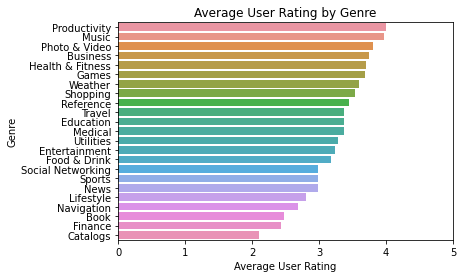

In [ ]:
# average user rating of apps per genre
df.groupby('prime_genre')['user_rating'].mean().round(3)

# average user rating of free apps per genre
df.loc[df.isFree == 1].groupby('prime_genre')['user_rating'].mean().round(3)

# average user rating of paid apps per genre
df.loc[df.isFree == 0].groupby('prime_genre')['user_rating'].mean().round(3)

# barplot - average user rating of all apps per genre
avg_rating = df.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
sns.barplot(avg_rating,avg_rating.index)
plt.title('Average User Rating by Genre')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.xlim(0,5)

(0.0, 5.0)

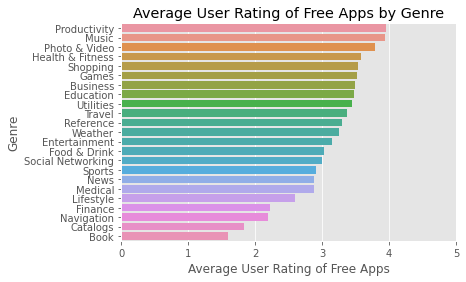

In [ ]:
# barplot - average user rating of free apps per genre
avg_rating_free = df.loc[df.isFree == 1].groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
sns.barplot(avg_rating_free,avg_rating_free.index)
plt.title('Average User Rating of Free Apps by Genre')
plt.xlabel('Average User Rating of Free Apps')
plt.ylabel('Genre')
plt.xlim(0,5)

(0.0, 5.0)

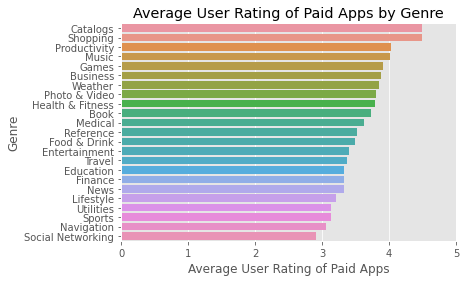

In [ ]:
# barplot - average user rating of paid apps per genre
avg_rating_paid = df.loc[df.isFree == 0].groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
sns.barplot(avg_rating_paid,avg_rating_paid.index)
plt.title('Average User Rating of Paid Apps by Genre')
plt.xlabel('Average User Rating of Paid Apps')
plt.ylabel('Genre')
plt.xlim(0,5)

By looking at the average rating by genre, we can gain a sense of how consumers liked apps within each category. This information can also give an idea as to how high the quality and enjoyable the user experience are of certain apps, as well as how much time and effort that tends to go into making apps of a certain genre.

In [ ]:
# convert bytes into megabytes
df['size_megabytes'] = (df['size_bytes']/1000000).round(2)

#drop size_bytes column
df.drop('size_bytes', axis=1, inplace=True)
df.head()


Text(0, 0.5, 'Genre')

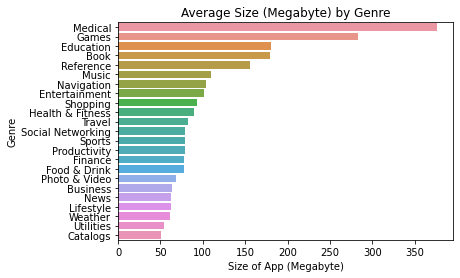

In [ ]:
#average size of apps per prime_genre
avg_app_size = df.groupby('prime_genre')['size_megabytes'].mean().sort_values(ascending=False)
#average size of free apps per prime_genre
avg_free_app_size = df.loc[df.isFree == 1].groupby('prime_genre')['size_megabytes'].mean().sort_values(ascending=False)

#average size of paid apps per prime_genre
avg_paid_app_size = df.loc[df.isFree == 0].groupby('prime_genre')['size_megabytes'].mean().sort_values(ascending=False)

#barplot - average app size per Genre

sns.barplot(avg_app_size,avg_app_size.index)
plt.title('Average Size (Megabyte) by Genre')
plt.xlabel('Size of App (Megabyte)')
plt.ylabel('Genre')

Text(0, 0.5, 'Genre')

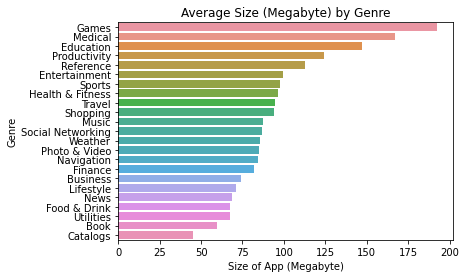

In [ ]:
#barplot - average app size of free apps per genre
sns.barplot(avg_free_app_size,avg_free_app_size.index)
plt.title('Average Size (Megabyte) by Genre (Free apps)')
plt.xlabel('Size of Free Apps (Megabyte)')
plt.ylabel('Genre')

Text(0, 0.5, 'Genre')

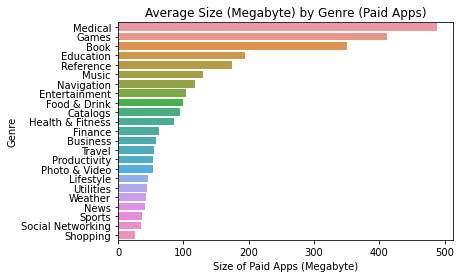

In [ ]:
#barplot - average app size of free apps per genre
sns.barplot(avg_paid_app_size,avg_paid_app_size.index)
plt.title('Average Size (Megabyte) by Genre (Paid Apps)')
plt.xlabel('Size of Paid Apps (Megabyte)')
plt.ylabel('Genre')

Text(0, 0.5, 'Genre')

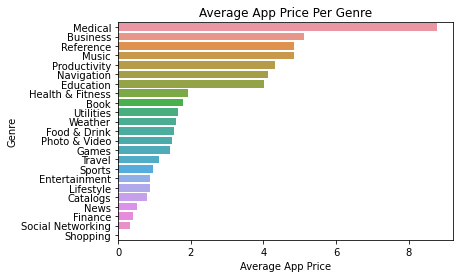

In [ ]:
#average app price per genre of paid apps
df.loc[df.isFree == 0].groupby('prime_genre')['price'].mean().round(2)
df.head()

avg_app_price = df.groupby('prime_genre')['price'].mean().sort_values(ascending=False)
sns.barplot(avg_app_price,avg_app_price.index)
plt.title('Average App Price Per Genre')
plt.xlabel('Average App Price')
plt.ylabel('Genre')

Looking at the average price of paid apps in comparison to the average user rating of paid apps in the visualization above, this tells us if the quality and overall user satisfaction is currently fair with how much users are being charged. 



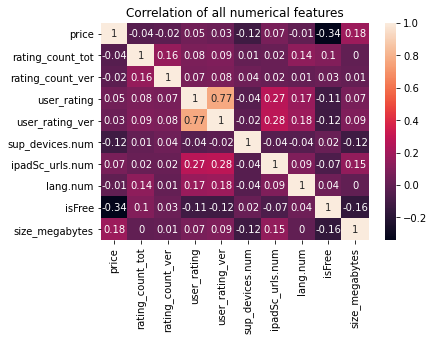

In [ ]:
# Correlation of all floats
forrcorr = df[['price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','cont_rating','sup_devices.num','ipadSc_urls.num','lang.num','isFree','size_megabytes']]
corrMatrix = forrcorr.corr()

sns.heatmap(corrMatrix.round(2), annot=True)
plt.title('Correlation of all numerical features')
plt.show()

In [ ]:
#creates rating count without the current version rating count. This allows for use of full historical data
df['rating_count'] = df['rating_count_tot'] - df['rating_count_ver']
df.drop(['rating_count_tot','rating_count_ver','user_rating_ver'], axis = 1, inplace = True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dfclass=[]
df['prime_genre'] = le.fit_transform(df['prime_genre'])
dfclass.append(le.classes_)

df.head()

,id,track_name,currency,price,user_rating,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,isFree,size_megabytes,rating_count
0,281656475,PAC-MAN Premium,USD,3.99,4.0,6.3.5,4+,7,38,5,10,1,0,100.79,21266
1,281796108,Evernote - stay organized,USD,0.00,4.0,8.2.2,4+,15,37,5,23,1,1,158.58,161039
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,3.5,5.0.0,4+,22,37,5,3,1,1,100.52,185761
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,4.0,5.10.0,12+,17,37,5,9,1,1,128.51,261592
4,282935706,Bible,USD,0.00,4.5,7.5.1,4+,16,37,5,45,1,1,92.77,980600


In [ ]:

X = df[['size_megabytes', 'isFree', 'price', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre', 'rating_count']]
y = df['user_rating']

# 
def categorized_rating(rating):
  if rating > 4:
    return 1
  else:
    return 0;
  
y = y.apply(categorized_rating)

Apps are categorized if they are good apps or not. If they have an average user rating greater than 4 then it is a good app, otherwise it is not a highly successful app.

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = SEED, stratify=y)

Best CV params {'C': 1, 'gamma': 0.001}
Best CV accuracy 0.6446071954339222
Test accuracy of best grid search hypers: 0.65
SVM train set score: 0.8151815181518152
SVM test set score: 0.65
[[578 231]
 [273 358]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       809
           1       0.61      0.57      0.59       631

    accuracy                           0.65      1440
   macro avg       0.64      0.64      0.64      1440
weighted avg       0.65      0.65      0.65      1440



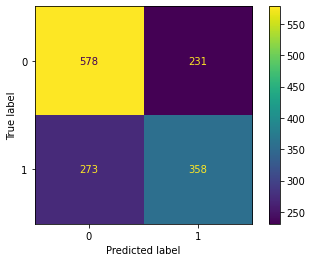

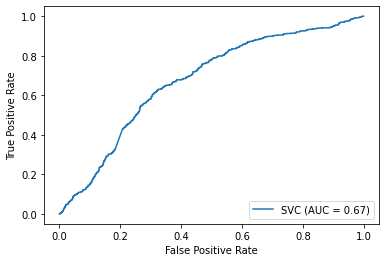

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

svm = SVC()

parameters = {'C':[0.01, 0.1,1,10], 'gamma':[0.001, 0.01, 0.1, 1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

svmodel = SVC(C = 1, gamma = 0.001)
svmodel.fit(X_train, y_train)
y_pred_svm = svmodel.predict(X_test)

print('SVM train set score:', svmodel.score(X_train, y_train))
print('SVM test set score:', svmodel.score(X_test, y_test))
print(confusion_matrix (y_test, y_pred_svm))
print(classification_report (y_test, y_pred_svm))
plot_confusion_matrix (svmodel, X_test, y_test,values_format='.4g')
plot_roc_curve(svmodel, X_test, y_test)

After running the SVM model we noticed that the model was overfitting on the training model as there was a drastic decrease in the test and training accuracy score. We used a Grid Search to find the best parameters therefore it seems that the SVM model was not the best fit. We decided to try out the Decision Tree Classifier model next.


Accuracy for training set: 0.71
Test set accuracy: 0.67
[[597 212]
 [270 361]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       809
           1       0.63      0.57      0.60       631

    accuracy                           0.67      1440
   macro avg       0.66      0.66      0.66      1440
weighted avg       0.66      0.67      0.66      1440



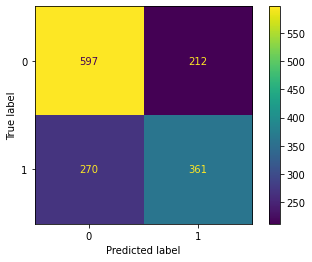

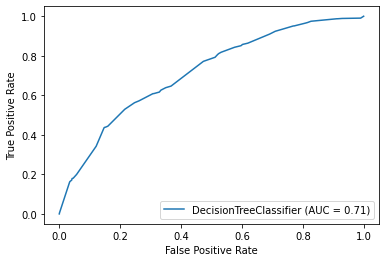

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
SEED=1

# Should test maximum depth of 6?
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


acc0 = accuracy_score(y_train, dt.predict(X_train))
print("Accuracy for training set: {:.2f}".format(acc0))

acc = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc))

print(confusion_matrix (y_test, y_pred_dt))
print(classification_report (y_test, y_pred_dt))
plot_confusion_matrix (dt, X_test, y_test,values_format='.4g')
plot_roc_curve(dt, X_test, y_test)

The Decision Tree Classifier had less of an overfitting problem. We believe that this was a much better model and decided to use a grid search on the Decision Tree Classifier model to find the best parameters.

Best GridSearch Params {'max_depth': 6, 'min_samples_leaf': 0.05}
0.6701388888888888
Test set ROC AUC score: 0.720
[[662 147]
 [328 303]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       809
           1       0.67      0.48      0.56       631

    accuracy                           0.67      1440
   macro avg       0.67      0.65      0.65      1440
weighted avg       0.67      0.67      0.66      1440



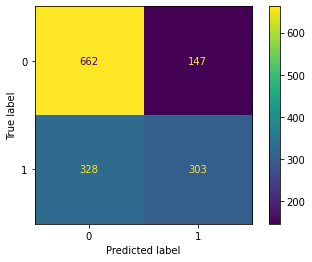

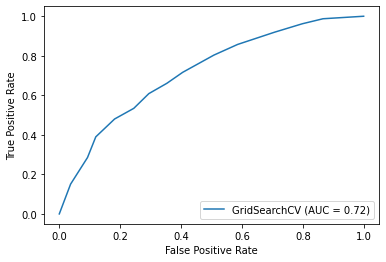

In [ ]:
## Model Tuning Using GridSearch 
# Define params_dt
params_dt = {'max_depth': [2,4,6], 'min_samples_leaf': [0.05, 0.12, 0.18]}


dt = DecisionTreeClassifier()

# Instantiate grid_dt
# ROC AUC measures accuracy of model, ROC area under curve
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

from sklearn.metrics import roc_auc_score
grid_dt.fit(X_train, y_train)
best_model = grid_dt.best_estimator_

y_pred_best_dt = best_model.predict(X_test)

y_pred_proba = best_model.predict_proba(X_test)[:,1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Best GridSearch Params', grid_dt.best_params_)
print(accuracy_score(y_test, y_pred_best_dt))
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

print(confusion_matrix (y_test, y_pred_best_dt))
print(classification_report (y_test, y_pred_best_dt))
plot_confusion_matrix (grid_dt, X_test, y_test,values_format='.4g')
plot_roc_curve(grid_dt, X_test, y_test)

After running the gridsearch with the decision tree classifier, we saw in increase between the training set and test set ROC AUC accuracy score. We believe this is the best model but we are going to try out hard soft voting to see if an ensemble model would increase our test accuracy score.

In [ ]:
#HARD SOFT

SEED=1

# 
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=50)
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=0.05, random_state=SEED)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

for clf_name, clf in classifiers:    
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)     
vc.fit(X_train, y_train)   

y_pred_vc = vc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))


Logistic Regression : 0.612
K Nearest Neighbours : 0.649
Classification Tree : 0.670
Voting Classifier: 0.670


With the use of the voting classifier we acutally recieved lower scores than the Decision Tree Classifier model so we will be testing out bootstraping aggregation to see if we can increase our test accuracy.

Test set accuracy: 0.664, OOB accuracy: 0.665
[[590 219]
 [265 366]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       809
           1       0.63      0.58      0.60       631

    accuracy                           0.66      1440
   macro avg       0.66      0.65      0.66      1440
weighted avg       0.66      0.66      0.66      1440



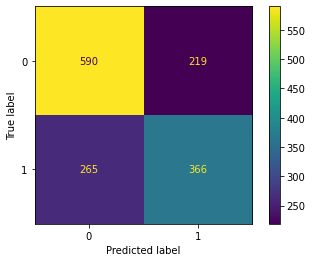

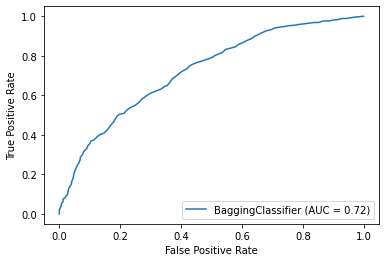

In [ ]:
#bagging: boostraping aggregation
from sklearn.ensemble import BaggingClassifier


dt = DecisionTreeClassifier(random_state=SEED)

bc = BaggingClassifier(base_estimator=dt, oob_score=True, n_estimators=100, random_state=SEED)

bc.fit(X_train, y_train)

y_pred_bc = bc.predict(X_test)


acc_test_bc = accuracy_score(y_test, y_pred_bc)
acc_oob_bc = bc.oob_score_
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test_bc, acc_oob_bc))

print(confusion_matrix (y_test, y_pred_bc))
print(classification_report (y_test, y_pred_bc))
plot_confusion_matrix (bc, X_test, y_test,values_format='.4g')
plot_roc_curve(bc, X_test, y_test)

Once again boostrapping had a slightly lower test accuracy score than the Decision Tree Classifier with gridsearch. However it does have a similar ROC AUC score. Trying Random Forest with tuning next.

In [ ]:

#random forest classifier with gridsearch tuning
from sklearn.ensemble import RandomForestClassifier
params_rf = {'n_estimators': [25, 50, 100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [0.05, 0.10, 0.12]
}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='roc_auc',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(X_train, y_train)


best_model = grid_rf.best_estimator_

y_pred_rf = best_model.predict(X_test)


y_pred_proba = best_model.predict_proba(X_test)[:,1]

test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(accuracy_score(y_test, y_pred_rf))


print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

print(confusion_matrix (y_test, y_pred_rf))
print(classification_report (y_test, y_pred_rf))
plot_confusion_matrix (best_model, X_test, y_test,values_format='.4g')
plot_roc_curve(best_model, X_test, y_test)

0.6604166666666667
Test set ROC AUC score: 0.723


The test ROC AUC score increased slightly from the Decision Tree Classifier. Using the Random Forest Classifier is the best model so far by 0.003. with 0.01 less than the Decision Tree Classifier for accuracy score. Next we will try Adaptive Boosting.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=SEED)

ada.fit(X_train, y_train)

y_pred_proba = ada.predict_proba(X_test)[:,1]


ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.66


The ROC AUC score dropped from the random forest model. Next to try is gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate gb

gb = GradientBoostingClassifier(max_depth=4, 
            subsample=0.8,
            n_estimators=50,
            random_state=1)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

y_pred_proba = ada.predict_proba(X_test)[:,1]

gb_acc = accuracy_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Accuracy score: {:.3f}'.format(gb_acc))
print('ROC AUC score: {:.3f}'.format(gb_roc_auc))

Accuracy score: 0.672
ROC AUC score: 0.661


Accuracy score dropped once again in comparison to other models. Our best model is the Random Forest model using GridSearch tuning.

# **3. Practical Recommendations**

First off, the number of paid and free apps in this dataset is more even than what most would think. If this is parallel to the market picture as a whole, it means pricing is a more important factor than a lot of people think it is. Pricing alone can have an adverse effect on the success of an app. This idea is further supported by looking at ratings of free versus paid apps in correlation to the price point.

We would also recommend app-makers to be especially careful when entering highly saturated markets like games and ones relating to medicine. For gaming apps, since there are so many, it is important to keep the quality and user satisfaction high in order to compete with the rest. As for medicine related apps, users may be more inclined to pay greater sums of money as they believe it will provide them with a more accurate and researched app. While keeping the price low for this genre is not the most important factor, ensuring the content is reliable and trustworthy will leave people with leaving higher user ratings and causing more customers to purchase a medical app. 

# **4. Conclusion**

It is important for app creators to understand how consumers interact with the different apps in terms of the price point, how highly it has been rated by other users, and the genre of the app. With this data, creators can make more informed decisions when making apps and successfully cater to what consumers most look for. Current information and data like this is crucial for content creators to understand not only past trends but also be able to predict what will consumers will want in the future. Not only will the adjustments based on this data and visualizations it will also please consumers as what they are looking for is available and ratings will surely increase.

The models that had similar ROC AUC score were Decision Tree Classifier using Gridsearch, Boostrapping the Decision Tree Classifier, and the Random Forest Classifier with Gridsearch. These three had very similar scoring and no single model stands out. They all have around 0.65 Accuracy score and 0.72 ROC AUC score, therefore, any of the models can be interchangable. 

#**5. Bibliography**

1. https://www.kaggle.com/adityapatil673/visual-analysis-of-apps-on-applestore/data

2. https://www.webopedia.com/TERM/A/apple_app_store.html